In [36]:
from paraphrase_metrics import ROUGEMetric
import pandas as pd
import numpy as np
import matplotlib.pyplot as vlt

In [37]:
datadir = "../../../data/backtranslate/"
readpath = datadir + "backtranslate.csv"

df = pd.read_csv(readpath, header=None, sep='\t', names=['s', 'p'])

sentences = df['s'].tolist()
paraps = df['p'].tolist()

In [38]:
metric = ROUGEMetric()
scores = metric.eval(sentences, paraps)

KeyboardInterrupt: 

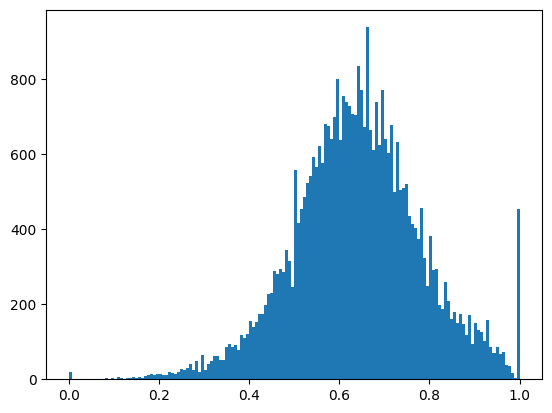

In [8]:
vlt.hist(scores, bins=150)
vlt.show()

In [23]:
sentences_np = np.array(sentences)
paraps_np = np.array(paraps)

zero_ix = np.nonzero(scores == 0)
one_ix = np.nonzero(scores == 1)
zero_pairs = np.array([[sentences_np[zero_ix], paraps_np[zero_ix]]]).T
one_pairs = np.array([[sentences_np[one_ix], paraps_np[one_ix]]]).T

In [24]:
for orig, bt in zero_pairs[:5]:
    print("Orig: ", orig)
    print("BT: ", bt)
    print()

Orig:  ['LJOTIČEVCI . . . . . . . . . . . . .']
BT:  ['Ljudje.........']

Orig:  ['te dvojnosti? . . . . . . . . . . . . . .']
BT:  ['V tej dualnosti...']

Orig:  ['raze sožalja, cvetje, sveče in svete maše, g. patru Luki za opravljen obr']
BT:  ['Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â']

Orig:  ['Se pravi, da država ne bi mogla vzdrževati profesionalne vojske?']
BT:  ['Ali je mogoče imeti profesionalno vojsko?']

Orig:  ['# which fax number to transmit to the receiving station']
BT:  ['# številka faksa, ki jo želite poslati sprejemni postaji']



In [25]:
for orig, bt in one_pairs[:5]:
    print("Orig: ", orig)
    print("BT: ", bt)
    print()

Orig:  ['PAOK: 4 Coldebella (30 let, 200), 5 Nikolaidis (24, 85), 6 Berry (34, 204), 8 Maslarinos (24, 192), 9 Balogiannis (28 (197), 10 Peral (24, 210), 11 King (26, 187), 12 Morales (29, 212), 13 Despos (23, 209), 15 Giannoulis (23, 208).']
BT:  ['PAOK: 4 Coldebella (30 let, 200), 5 Nikolaidis (24, 85), 6 Berry (34, 204), 8 Maslarinos (24, 192, 9 Balogiannis (28 (197), 10 Peral (24, 210), 11 King (26, 187), 12 Morales (29, 212), 13 Despos (23, 209, 15) Giannoulis (23, 208).']

Orig:  ['Pari: Savinjski Hopsi - Helios (19.30), Loka kava - Triglav (18), Kraški zidar - Pivovarna Laško (19), Krka Telekom - Zagorje (20), ZM Maribor - Slovan (20), Union Olimpija - Rogla Atras (četrtek, 19). E. B.']
BT:  [': Pari Savinjski Hopsi - Helios (19.30), Loka kava - Triglav (18), Kraški zidar - Pivovarna Laško (19), Krka Telekom - Zagorje (20), ZM Maribor - Slovan (20), Union Olimpija - Rogla Atras (četrtek, 19). E. B.']

Orig:  ['Zagovornik Borisa Popoviča, meni, da odgovorni delajo prepočasi in "p

In [28]:
for step in np.arange(0.1, 1, 0.1):
    score_ix = np.nonzero(np.abs(scores - step) < 0.05)

    score_pairs = np.array([[sentences_np[score_ix], paraps_np[score_ix]]]).T

    print("----------------------------------------")
    print("Score: ", step)
    for orig, bt in score_pairs[:5]:
        print("Orig: ", orig)
        print("BT: ", bt)
        print()

----------------------------------------
Score:  0.1
Orig:  ['ALKENE PRIDOBIVAMO PREDVSEM Z RAZLIČNIMI ELIMINACIJSKIMI REAKCIJAMI, KI JIH LAHKO POJMUJEMO ZA OBRATNE REAKCIJE ADICIJAM. ČE JE ADICIJA SPONTANA, ELIMINACIJA NE MORE BITI SPONTANA. ZA ELIMINACIJO VODIKOVEGA HALOGENIDA IZ MOLEKULE HALOGENOALKANA UPORABIMO MOČNO BAZO IN POVIŠANO TEMPERATURO. BAZA REAGIRA Z VODIKOVIM IONOM, IN KADAR DELAMO V NEVODNEM MEDIJU, SE IZLOČI TUDI USTREZNA SOL (NATRIJEV ALI KALIJEV HALOGENID). ELIMINACIJO SMO TOREJ POVZROČILI Z VEZAVO OBEH ATOMOV, KI STA SE ELIMINIRALA. VČASIH PA FORMALNO PIŠEMO TAKO REAKCIJO KOT ELIMINACIJO VODIKOVEGA HALOGENIDA.']
BT:  ['Za pridobivanje mleka in mlečnih izdelkov uporabljamo močno bazo in povečano tehniko. Za pridobivanje mleka in mlečnih izdelkov uporabljamo močno bazo in razširjen postopek za pridobivanje mleka in mlečnih izdelkov, vendar ne uporabljamo iste metode kot za pridobivanje mleka in mlečnih izdelkov. Uporabljamo enako metodo kot za pridobivanje mleka in m

In [35]:
t_low = 0.4
t_high = 0.75

print(np.count_nonzero((scores > t_low) & (scores < t_high)))

27431


In [49]:
import sys
import importlib
importlib.reload(sys.modules['eval_backend_handler'])

sys.path.append("../")

import eval_backend_handler as ebh

df = ebh.get_score_pd()

In [50]:
id = "uskladitev"
for i in range(10):
    print(ebh.get_text(f"{id}-{i}").originalText)
    print(ebh.get_text(f"{id}-{i}").paraphrasedText)
    print(df[df['textId'] == f"{id}-{i}"]) 
    print("-------------------------------------------------")  

TextSchema(textId='uskladitev-0', originalText='"Ima me, da bi te naskočil s sovražnim prevzemom," reče rjavolasec v Kenneth Coleu.', paraphrasedText='"me mika, da bi skočil na vas s sovražnim prevzemom," pravi rjavolaska v Kenneth Cole.')
          textId scorerId  appropriateness  fluency  diversity
15  uskladitev-0    joze2              5.0      5.0        5.0
16  uskladitev-0   ogjoze              8.0      9.0        3.0
18  uskladitev-0     joze              7.0      8.5        8.0
-------------------------------------------------
TextSchema(textId='uskladitev-1', originalText='Kako naj pozabim gomilo, kjer tvoje plemenito spi srce, ki tako iskreno me je ljubilo vse do zadnjega je dne.', paraphrasedText='Kako bi lahko pozabil gomilo, kjer je vaš plemeniti spi srce, ki je tako iskreno me je ljubil do zadnjega dne.')
          textId scorerId  appropriateness  fluency  diversity
17  uskladitev-1    joze2              3.0      2.0        1.0
19  uskladitev-1   ogjoze              8.0